In [15]:
# Import the libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

In [16]:
cat_image="/kaggle/input/cats-and-dogs/train/cat"
dog_image="/kaggle/input/cats-and-dogs/train/dog"

In [17]:
cat_images=os.listdir(cat_image)
dog_images=os.listdir(dog_image)

In [18]:
print(f"Number of Cat images:{len(cat_images)}")
print(f"Number of Dog images:{len(dog_images)}")

Number of Cat images:95
Number of Dog images:180


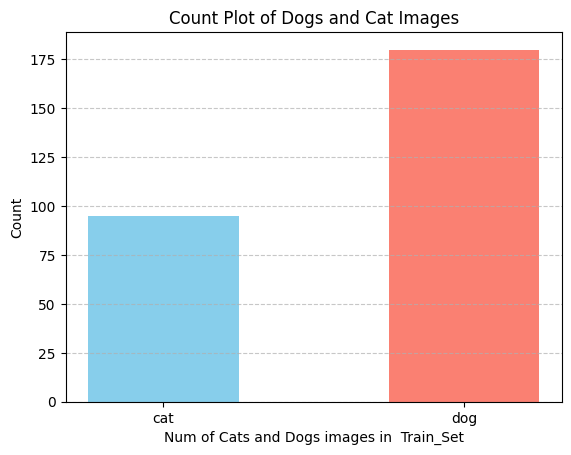

In [19]:
# lets visualise the above numeric data
data = [len(cat_images),len(dog_images)]
keys = ["cat", "dog"]

colors = ['skyblue', 'salmon']

plt.bar(keys,data, color=colors, width=0.5)
plt.xlabel("Num of Cats and Dogs images in  Train_Set")
plt.ylabel("Count")
plt.title("Count Plot of Dogs and Cat Images")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
image_directory="/kaggle/input/cats-and-dogs/train"
batch_size=32
img_width=224
img_height=224

train_data = tf.keras.utils.image_dataset_from_directory(image_directory,
                                                         validation_split=0.2,
                                                         seed=123,
                                                         subset="training",
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 275 files belonging to 2 classes.
Using 220 files for training.


In [21]:
# Lets create the Validation data 
val_data = tf.keras.utils.image_dataset_from_directory(image_directory,
                                                       validation_split=0.2,
                                                       subset="validation",
                                                       seed=123,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size)

Found 275 files belonging to 2 classes.
Using 55 files for validation.


In [22]:
# Print the class names
class_names=train_data.class_names
print(f"Category_Names:{class_names}")

Category_Names:['cat', 'dog']


In [23]:
# lets visualise the single image
for image, lable in train_data.take(1):
    print(f"Image shape with Batch_Size:{image.shape}")
    print("_____________________________________________")
    print(f"Shape of the image is:{image[0].shape}")
    print("_____________________________________________")
    print(f"Label of the image is:{class_names[lable[0]]}")
    print("_____________________________________________")
    print(f"Image is in the form of tensor:{image[0]}")

Image shape with Batch_Size:(32, 224, 224, 3)
_____________________________________________
Shape of the image is:(224, 224, 3)
_____________________________________________
Label of the image is:dog
_____________________________________________
Image is in the form of tensor:[[[249.87102 253.64134 252.87102]
  [247.03859 251.03859 250.03859]
  [250.16829 253.77885 253.16829]
  ...
  [254.38393 249.38393 255.     ]
  [253.38393 248.38393 254.38393]
  [253.38393 248.38393 254.38393]]

 [[251.63544 254.78723 254.63544]
  [248.4245  252.3039  251.4245 ]
  [251.19212 254.35149 254.19212]
  ...
  [254.      249.      255.     ]
  [253.      248.      254.     ]
  [253.      248.      254.     ]]

 [[248.80843 252.77615 251.80843]
  [251.26921 255.      254.26921]
  [251.95535 254.96428 254.95535]
  ...
  [253.      248.      254.     ]
  [252.      247.      253.     ]
  [252.      247.      253.     ]]

 ...

 [[233.72322 166.72322 149.56252]
  [227.51923 160.51923 143.35852]
  [227.9018  

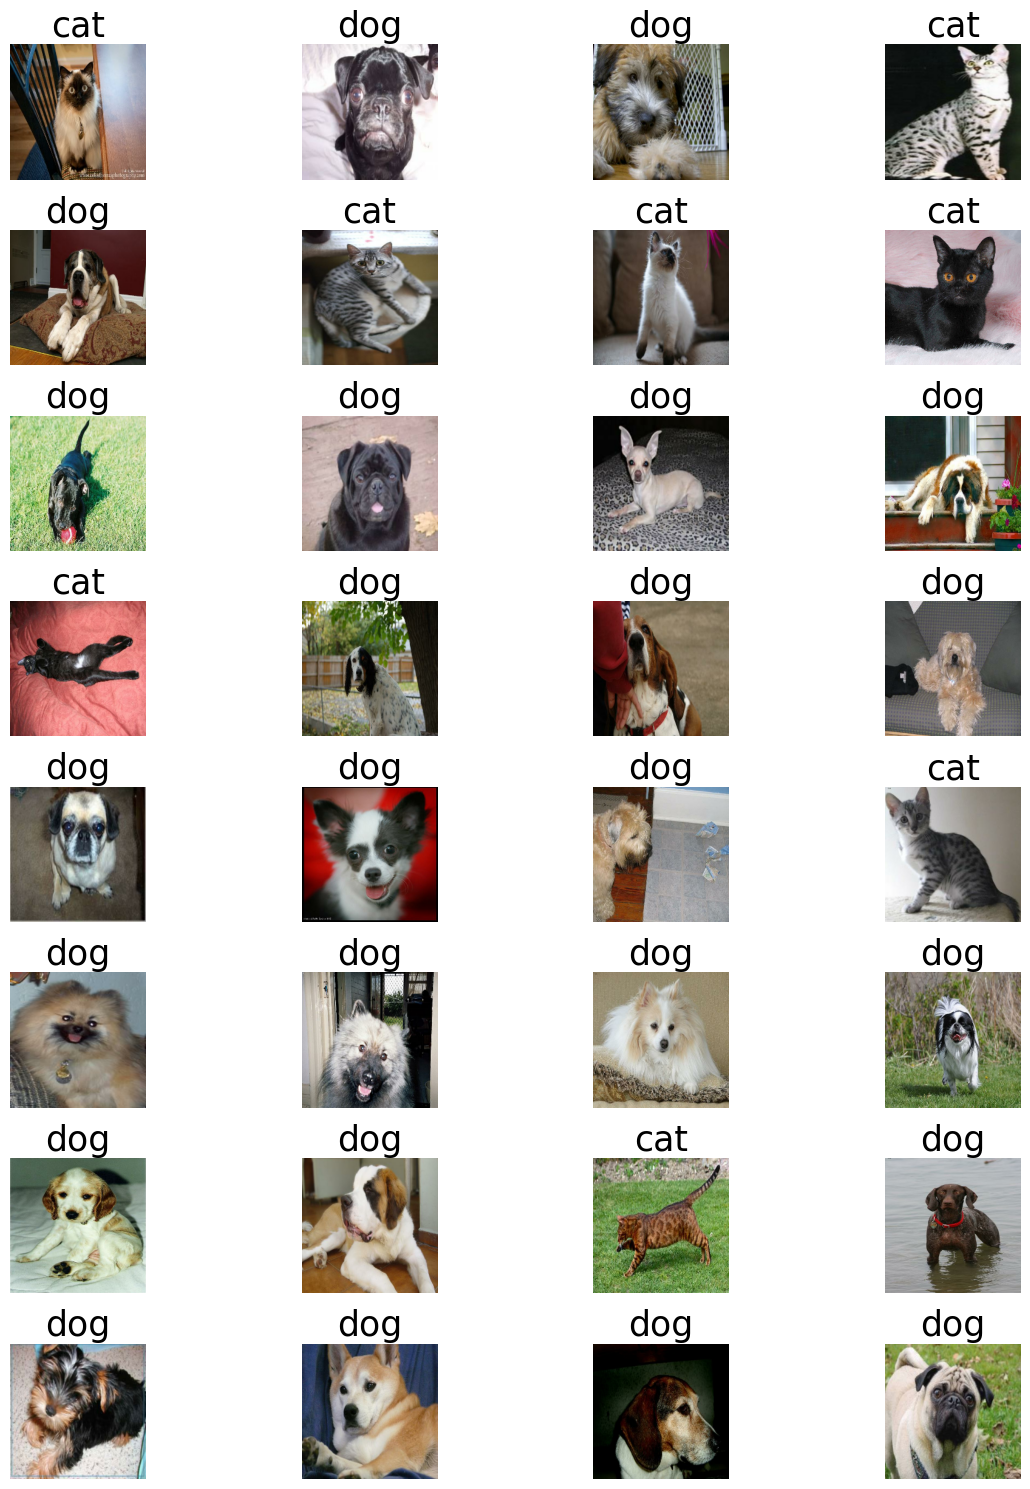

In [24]:
# Plot the images
plt.figure(figsize=(15,15), tight_layout=True, facecolor="white")
for image, label in train_data.take(1):
    for i in range(32):
        ax=plt.subplot(8,4, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]], fontsize=25)
        plt.axis("off")



> **Data augmentation** is a technique used in machine learning, particularly in computer vision tasks such as image classification or object detection, to artificially expand the size of a dataset by applying various transformations to the existing data.

> The primary goal of data augmentation is to **increase the diversity and variability of the training dataset** without actually collecting new data. By applying different transformations to the existing training data, the model becomes more robust and generalizes better to new, unseen data. It helps in preventing overfitting and improves the model's ability to recognize patterns and features in various conditions.


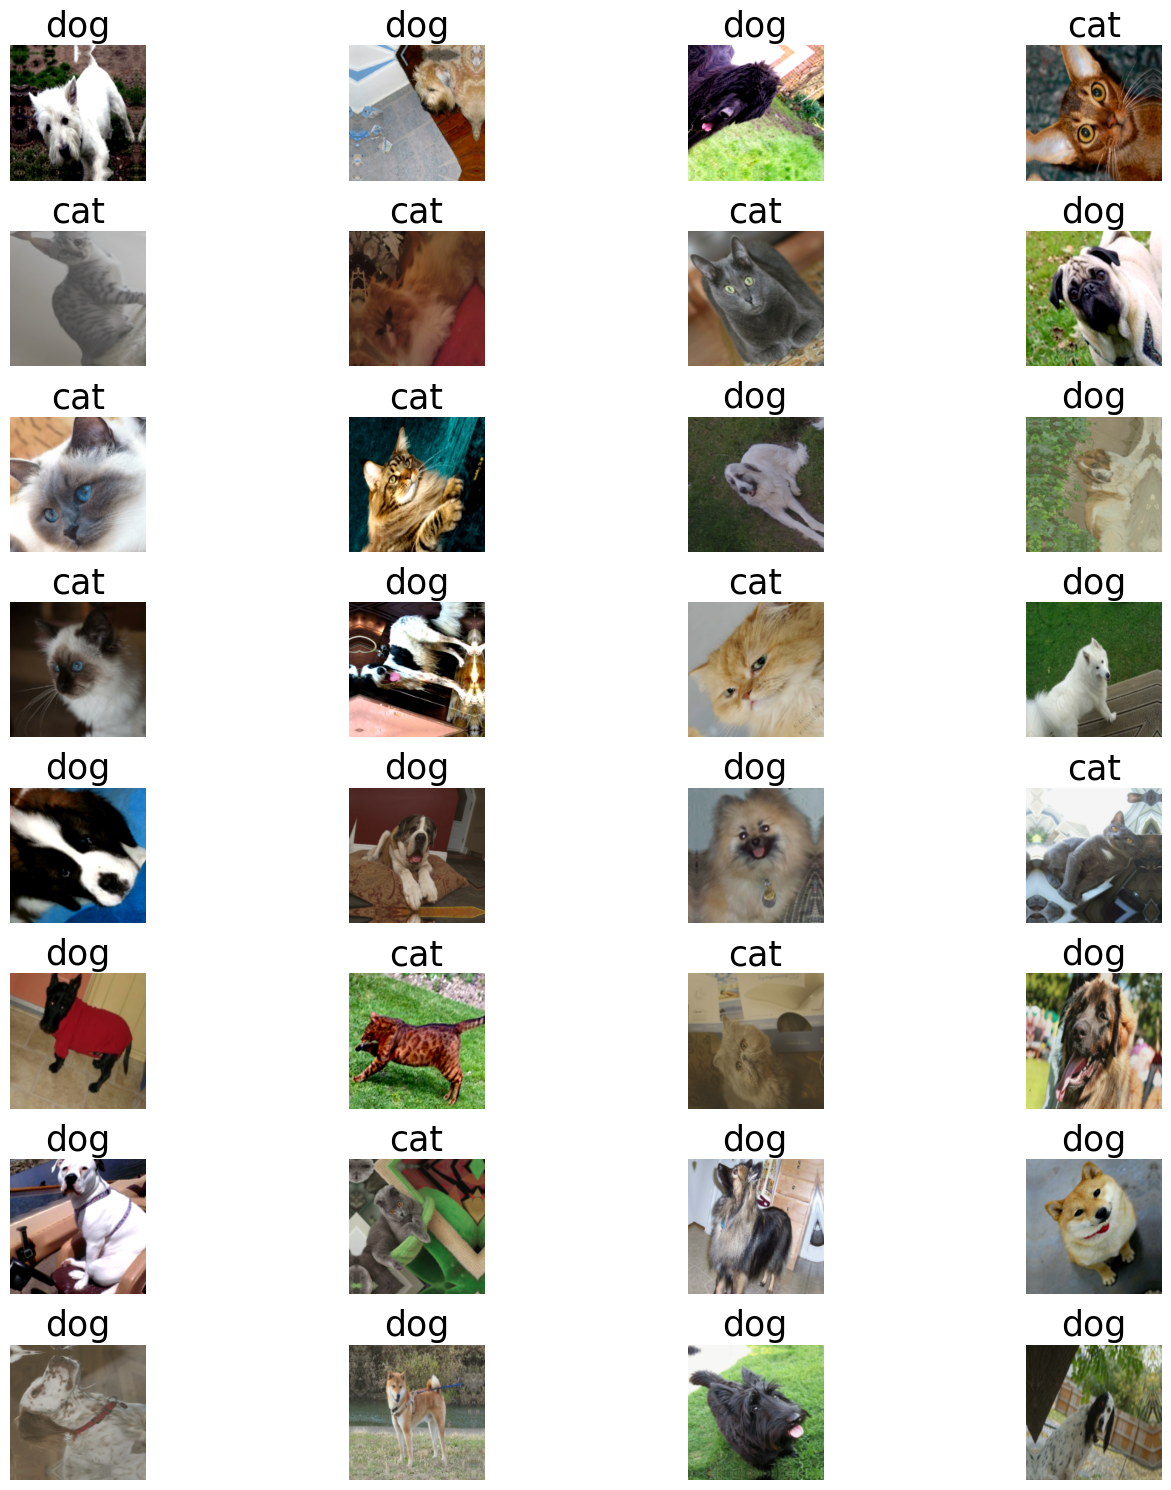

In [25]:
# Apply Data Augmentation to training data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode='horizontal'),  # Flip horizontally
    tf.keras.layers.RandomRotation(factor=0.20),    # Rotation by 20%
    #tf.keras.layers.RandomFlip(mode='vertical'),    # Flip vertically
    tf.keras.layers.RandomZoom(.2, .2),             # Zoom the image
    tf.keras.layers.RandomContrast(0.5)             # contrast the image
    
])



plt.figure(figsize=(15,15), tight_layout=True)
for images, labels in train_data.take(1):      
    augmented_images = []
    for i in range(32):
        augmented_image = data_augmentation(images[i], training=True)
        augmented_images.append(augmented_image)

    for i in range(32):
        plt.subplot(8, 4, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]],fontsize=25)
        plt.axis("off")

plt.show()


In [26]:
# Lets create the test data
image_directory="/kaggle/input/cats-and-dogs/val"
batch_size=32
img_width=224
img_height=224


test_data = tf.keras.utils.image_dataset_from_directory(image_directory,
                                                         seed=123,
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 70 files belonging to 2 classes.


In [27]:
rescale_layer = tf.keras.Sequential([tf.keras.layers.Rescaling(1./255)])



> **ResNet-50** is a convolutional neural network (CNN) architecture that belongs to the ResNet (Residual Network) family. The key characteristics of ResNet-50 include:

> 1. **Deep Architecture:** ResNet-50 is relatively deep, consisting of 50 layers, which includes convolutional layers, pooling layers, fully connected layers, and skip connections (also known as shortcut connections).
> 
> 2. **Pre-trained Models:** The ResNet-50 model is often pre-trained on a large dataset, typically the ImageNet dataset, which contains millions of images from thousands of classes. Pre-training helps in leveraging features learned from a diverse dataset, enabling the model to perform better on other image-related tasks even with smaller datasets.
>
> 3. **State-of-the-Art Performance:** ResNet-50 has shown state-of-the-art performance in various computer vision tasks, including image classification, object detection, and image segmentation.
> 

**ImageNet** consists of over 14 million images that are hand-annotated more than 20,000 categories or classes. These images cover a wide variety of objects, animals, scenes, and more. Initially, ImageNet gained significant attention due to the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), an annual competition where participants competed in image classification tasks using subsets of the ImageNet dataset.

In [28]:
# Create base model with tf.keras.applications
base_model =tf.keras.applications.resnet50.ResNet50(include_top=False,weights='imagenet')


# Freeze the base model (so the pre-learned patterns remain same)
base_model.trainable = False


# Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
inputs=rescale_layer(inputs)                        # data preprocessing layer
inputs=data_augmentation(inputs)                    # data augmentation layer
x = base_model(inputs)


# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")


# Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(64, activation="relu")(x)
x=tf.keras.layers.Dropout(0.2)(x)

# Create the output activation layer
outputs=tf.keras.layers.Dense(2, activation="softmax",name="output_layer")(x)


# Combine the inputs with the outputs into a model
model= tf.keras.Model(inputs, outputs, name="model")



# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),   
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"]
             )


# Callbacks--> Stop training automatically once the model performance stop improving
learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=10,factor=0.5, min_lr=0.00001,verbose =1)
Early_Stopping= tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5, restore_best_weights=True)

# Fit the model
history1= model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[Early_Stopping,learning_rate_reduction], verbose=1)

Shape after base_model: (None, 7, 7, 2048)
Epoch 1/10
7/7 [==============================] - 8s 544ms/step - loss: 0.3846 - accuracy: 0.8045 - val_loss: 0.1843 - val_accuracy: 0.9273 - lr: 0.0010
Epoch 2/10
7/7 [==============================] - 1s 113ms/step - loss: 0.0848 - accuracy: 0.9727 - val_loss: 0.1696 - val_accuracy: 0.9455 - lr: 0.0010
Epoch 3/10
7/7 [==============================] - 1s 111ms/step - loss: 0.1018 - accuracy: 0.9682 - val_loss: 0.0878 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 4/10
7/7 [==============================] - 1s 106ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0550 - val_accuracy: 0.9455 - lr: 0.0010
Epoch 5/10
7/7 [==============================] - 1s 86ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0639 - val_accuracy: 0.9636 - lr: 0.0010
Epoch 6/10
7/7 [==============================] - 1s 109ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0359 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 7/10
7/7 [========================

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                131136    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                             

In [30]:
loss, accuracy= model.evaluate(val_data)
print(f"Loss is:{loss}")
print(f"Accuracy is:{accuracy}")

2/2 [==============================] - 0s 49ms/step - loss: 0.0254 - accuracy: 1.0000
Loss is:0.025425143539905548
Accuracy is:1.0


In [31]:
history= pd.DataFrame(history1.history)
history.head()

loss  accuracy  val_loss  val_accuracy     lr
0  0.384557  0.804545  0.184323      0.927273  0.001
1  0.084763  0.972727  0.169602      0.945455  0.001
2  0.101826  0.968182  0.087824      0.981818  0.001
3  0.028742  0.990909  0.055042      0.945455  0.001
4  0.012813  1.000000  0.063883      0.963636  0.001

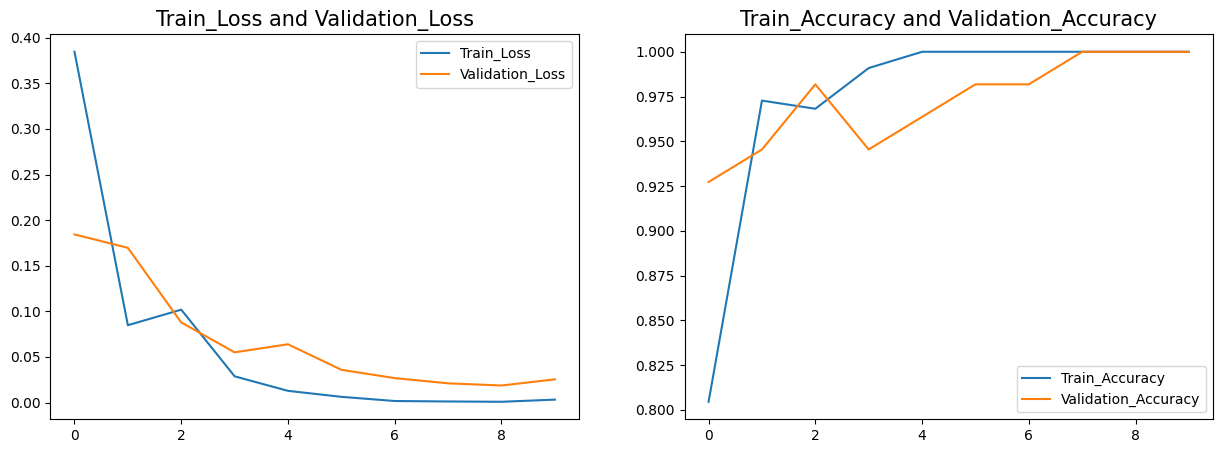

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history['loss'],label='Train_Loss')
plt.plot(history['val_loss'],label='Validation_Loss')
plt.title('Train_Loss and Validation_Loss',fontsize=15)
plt.legend()


plt.subplot(1,2,2)
plt.plot(history['accuracy'],label='Train_Accuracy')
plt.plot(history['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy and Validation_Accuracy',fontsize=15)
plt.legend()
plt.show()

In [33]:
loss, accuracy= model.evaluate(test_data)
print(f"Loss is:{loss}")
print(f"Accuracy is:{accuracy}")

3/3 [==============================] - 1s 214ms/step - loss: 0.0798 - accuracy: 0.9571
Loss is:0.07981272786855698
Accuracy is:0.9571428298950195


In [34]:
x_val=[]
y_val=[]
y_pred=[]

for images, labels in test_data:
    x_val.extend(images.numpy())
    y_val.extend(labels.numpy())
    

predictions=model.predict(np.array(x_val))
for i in predictions:
    y_pred.append(np.argmax(i))

3/3 [==============================] - 1s 52ms/step


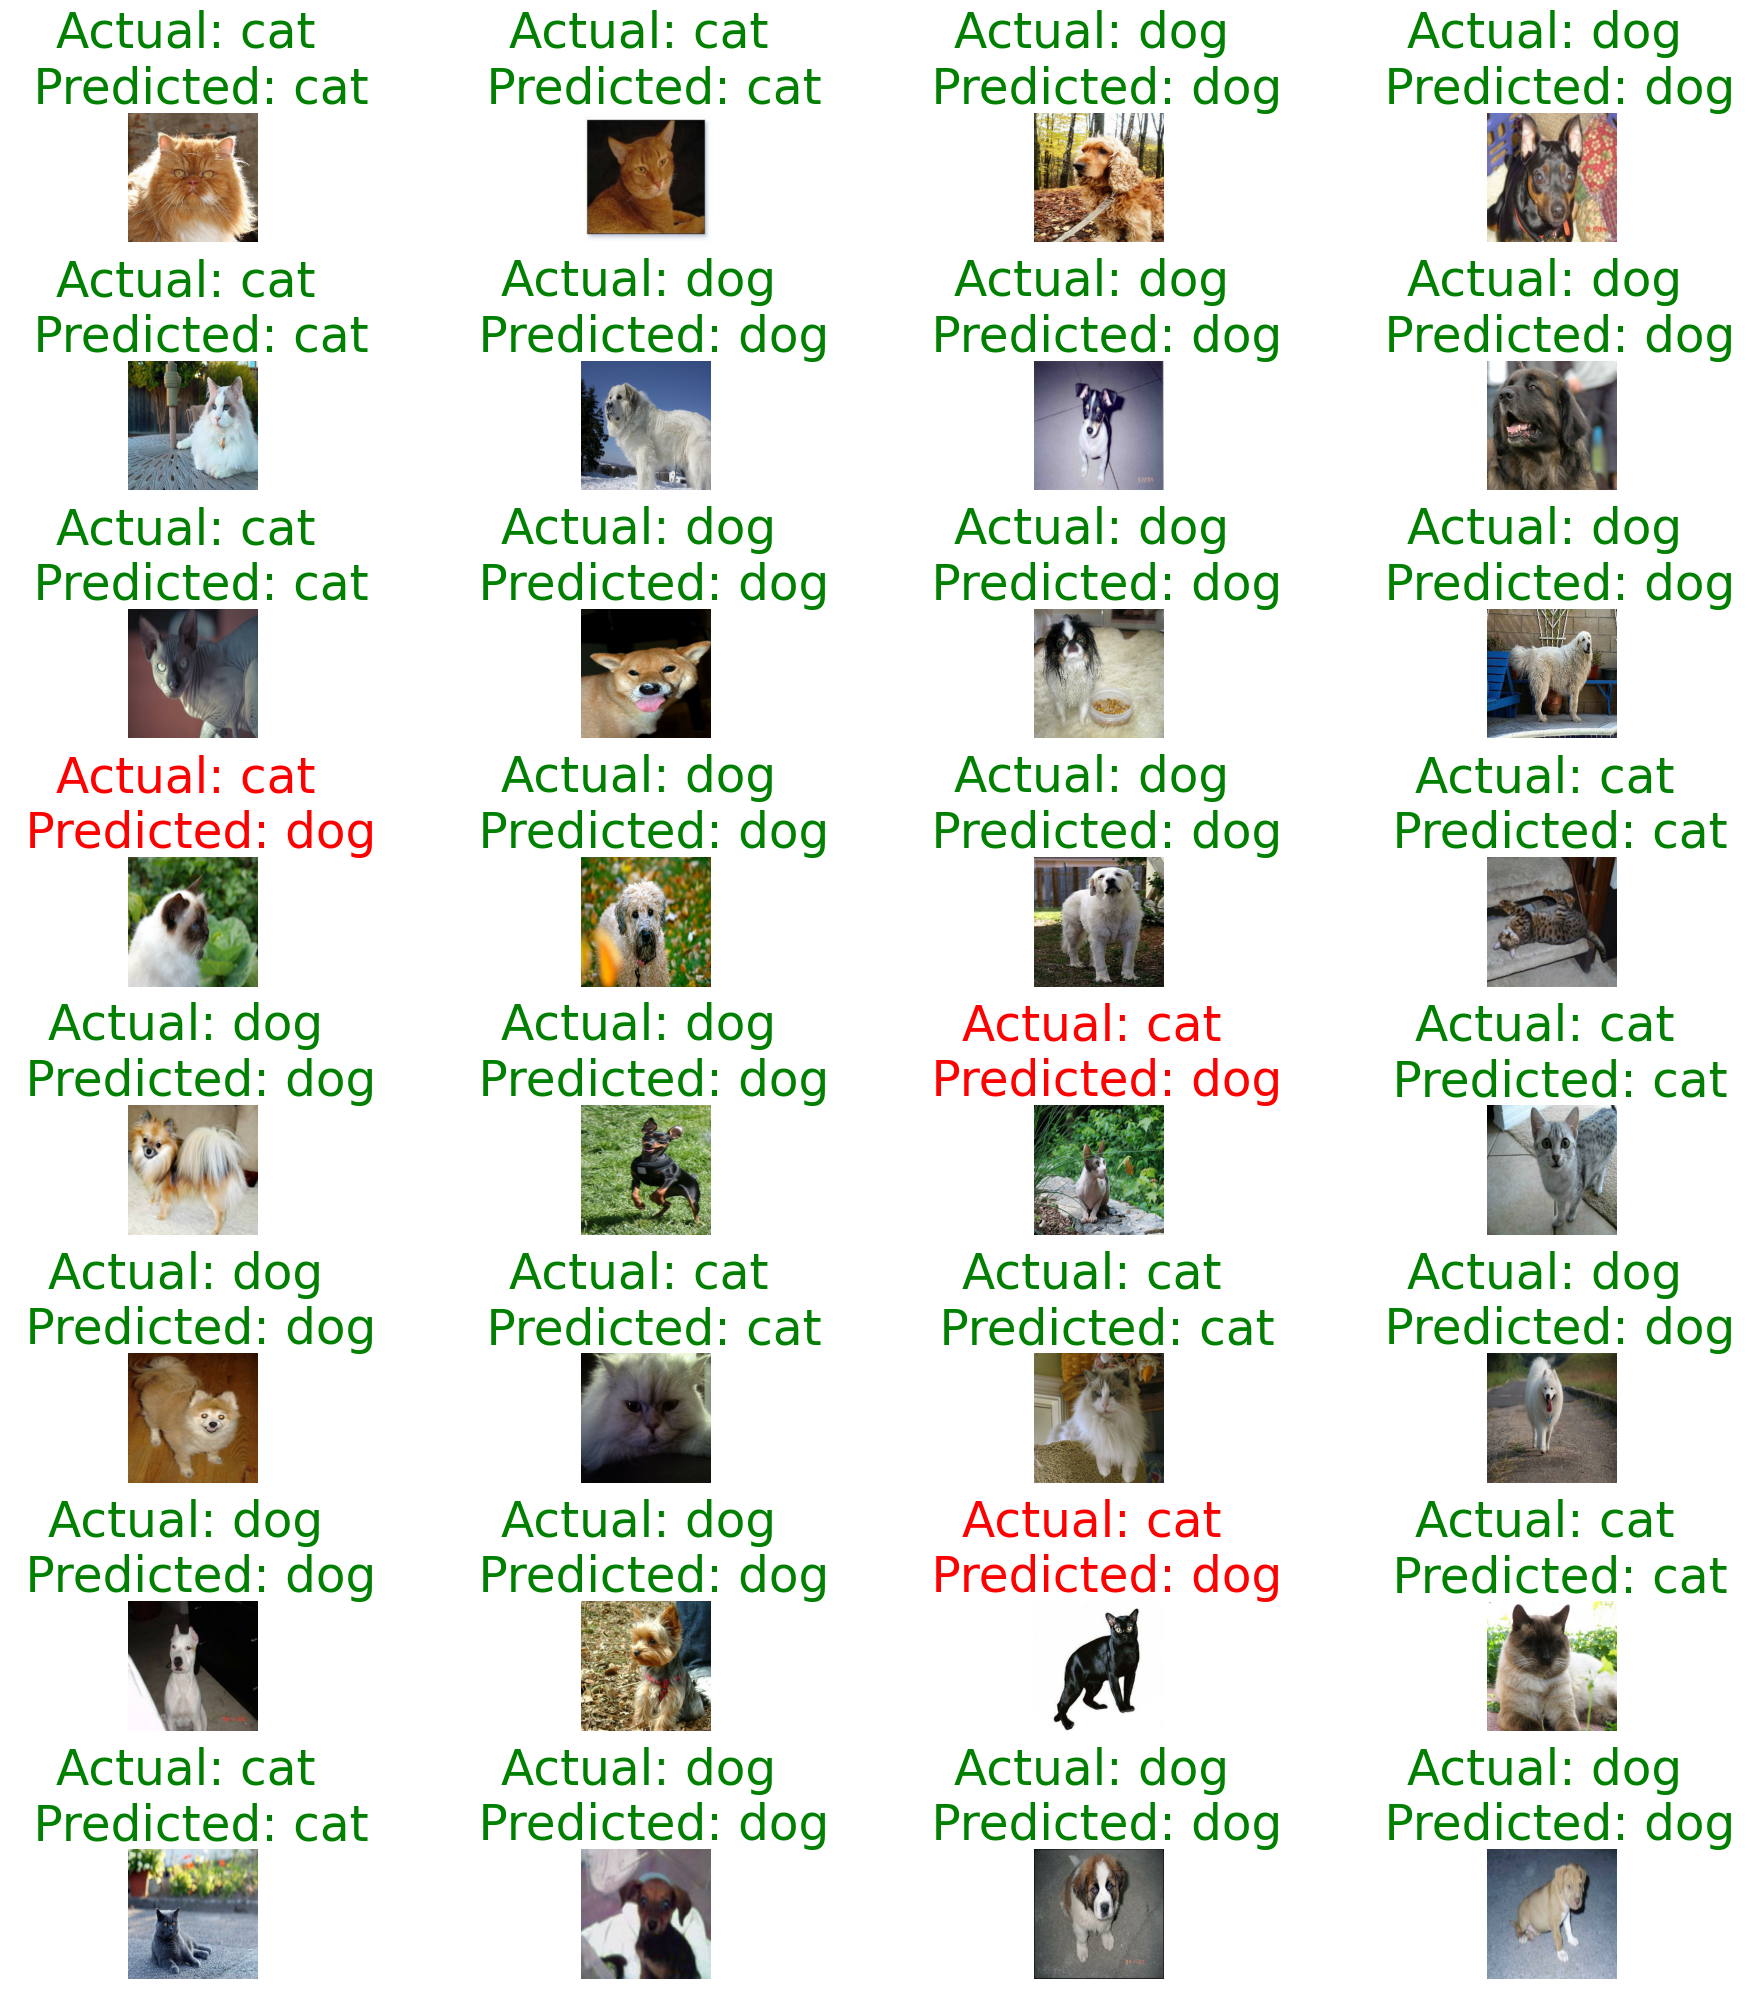

In [35]:
plt.figure(figsize=(20, 20),tight_layout=True)

for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(x_val[i].astype("uint8"))
    actual_label = class_names[y_val[i]]
    predicted_label = class_names[y_pred[i]]
    
    # Check if the actual and predicted labels are the same
    if actual_label == predicted_label:
        label_color = 'green'
    else:
        label_color = 'red'
    
    plt.title(f'Actual: {actual_label} \n Predicted: {predicted_label}', color=label_color, fontsize=35)
    plt.axis("off")

plt.show()

F1-Score:[0.9508771929824562]
Precision:[0.9375]
Recall:[0.9693877551020409]
Classification_Report
-----------------------
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.94      1.00      0.97        46

    accuracy                           0.96        70
   macro avg       0.97      0.94      0.95        70
weighted avg       0.96      0.96      0.96        70

Confusion_Matrix
----------------------


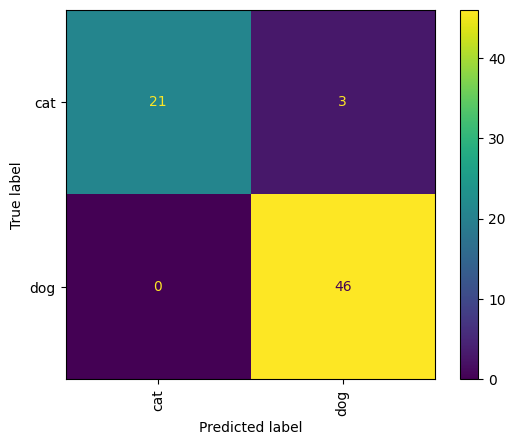

In [36]:
f1_scores=[]
precision_scores=[]
recall_scores=[]

f1_scores.append(f1_score(y_pred, y_val, average="macro"))
precision_scores.append(precision_score(y_pred, y_val, average="macro"))
recall_scores.append(recall_score(y_pred, y_val, average="macro"))


# Print the Results
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")



print("Classification_Report")
print("-----------------------")
print(classification_report(y_val,y_pred))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, display_labels=class_names, xticks_rotation="vertical")
plt.show()

In [37]:
model_name=["ResNet50"]
result_df= pd.DataFrame({"F1_Score":f1_scores, "Precision_Score":precision_scores, "Recall_Score":recall_scores}, index=model_name)
result_df= result_df.T.sort_values(by="ResNet50", ascending=False)
result_df

ResNet50
Recall_Score     0.969388
F1_Score         0.950877
Precision_Score  0.937500

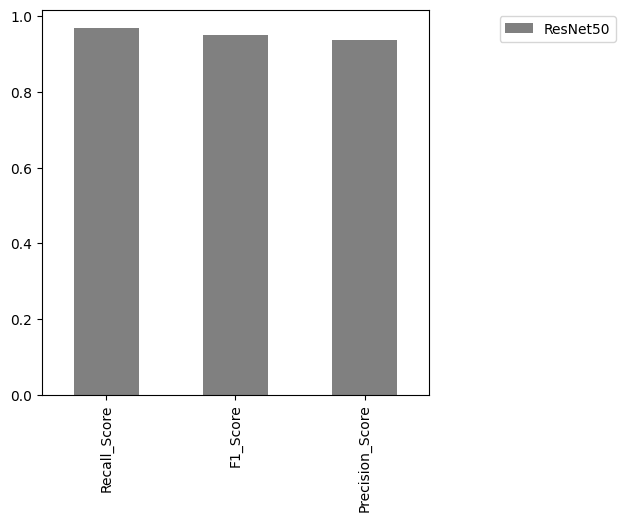

In [38]:
result_df.plot(kind="bar",figsize=(5,5), color="Grey").legend(bbox_to_anchor=(1.5,1))